# Centrality Analysis

**Bridge Analysis**
- Type 1: Bridges that have followers from both communities
  -  Betweeness Centrality :   

- Type 2: Bridges that have followers only from one communities, and follow one or more bridges itself.
  -  Betweeness Centrality : How critical is the node in spreading information into the community where all its followers are from.
  -  Closeness Centrality : How efficient it is for information to spread from this user/node.

**Community Analysis**
- Closeness Centrality : lower the closeness indicates the more important the node is within its echo chamber. 

In [26]:
%load_ext autoreload
%autoreload 2

import json
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
sys.path.insert(0, '/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset')
import header as head
import centrality_head as ch
from itertools import islice

centrality_path = "/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Graph Construction

In [30]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/follow/user_followed_by.json") as file:
    node_relations = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow/with_bridges.json") as file:
    communities = json.load(file)

G = ch.makeDiGraph(node_relations,communities)
rum = [ x for x,y in G.nodes(data=True) if y["at"] == "rumours"]
nonrum = [ x for x,y in G.nodes(data=True) if y["at"] == "non_rumours"]
uncat = [ x for x,y in G.nodes(data=True) if y["at"] == "uncategorized"]
bridges = [ x for x,y in G.nodes(data=True) if y["at"] == "bridges"]

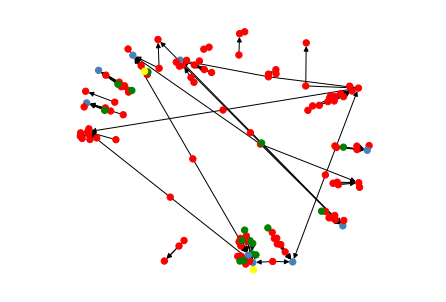

In [31]:
colors = []
for x,y in G.nodes(data=True):
    colors.append(y["color"] )
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G,node_color = colors, node_size=40)
# nx.draw_networkx_nodes(G,pos,nodelist=rum,node_color="red", node_size=40)
# nx.draw_networkx_nodes(G,pos,nodelist=nonrum,node_color="green", node_size=40)
# nx.draw_networkx_nodes(G,pos,nodelist=uncat,node_color="yellow", node_size=40)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.show()

In [ ]:
strong =[ c for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)] 
print(list(strong[0]))
strong = list(strong[0].union(strong[1]))
sub_G = G.subgraph(strong)
colors = [G.nodes[x]["color"] for x in sub_G.nodes()]
labels = {}
for x,y in sub_G.nodes(data=True):
    labels[x] = x

pos = nx.spring_layout(sub_G, k=0.45, iterations=20)
ch.visualize(sub_G,pos,labels,colors,40,"bottom","right")
plt.show()

In [13]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/who_reacted_by_whom.json") as file:
    node_relations = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/react/communities.json") as file:
    communities = json.load(file)

R_G = ch.makeDiGraph(node_relations,communities)
rum = [ x for x,y in R_G.nodes(data=True) if y["at"] == "rumours"]
nonrum = [ x for x,y in R_G.nodes(data=True) if y["at"] == "non_rumours"]
uncat = [ x for x,y in R_G.nodes(data=True) if y["at"] == "uncategorized"]
bridges = [ x for x,y in R_G.nodes(data=True) if y["at"] == "bridges"]

In [ ]:
strong = [
    c 
    for c in sorted(nx.strongly_connected_components(R_G), key=len, reverse=True)
]
print(strong)

['yellow', 'green', 'green', 'green', 'green', 'green']


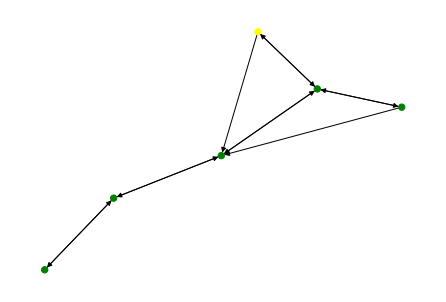

In [16]:
strong = list(max(nx.strongly_connected_components(R_G), key=len))

sub_R_G = R_G.subgraph(strong)
colors = [R_G.nodes[x]["color"] for x in strong]
print(colors)
pos = nx.spring_layout(sub_R_G, k=0.15, iterations=20)
nx.draw(sub_R_G,pos,node_color=colors,node_size=40)
plt.show()

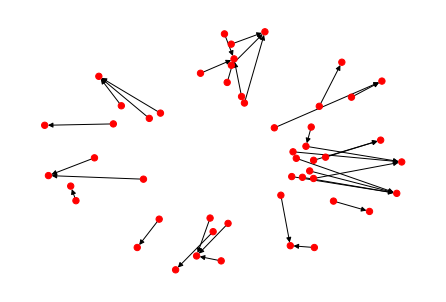

In [151]:
# R_G.remove_nodes_from(list(nx.isolates(R_G)))
subGraph = R_G.subgraph([x for x,y in R_G.nodes(data=True) if y["at"]=="rumours"] )
isolates = list(nx.isolates(subGraph))
subsubGraph = R_G.subgraph(list(set(subGraph.nodes()).difference(set(isolates))))

colors = []
for x,y in subsubGraph.nodes(data=True):
    if y["at"]=="rumours": colors.append("red")
    if y["at"]=="non_rumours": colors.append("green")
    if y["at"]=="uncategorized": colors.append("yellow")
    if y["at"]=="bridges": colors.append("#1f78b4")
pos = nx.spring_layout(subsubGraph, k=0.15, iterations=20)
nx.draw(subsubGraph,pos,node_color=colors,node_size=40)
plt.show()

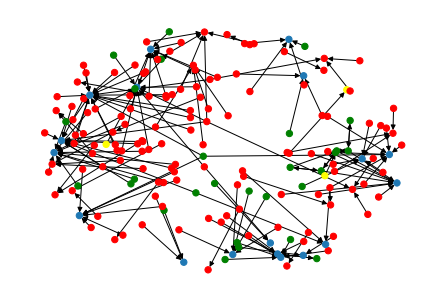

In [152]:
# R_G.remove_nodes_from(list(nx.isolates(R_G)))
colors = []
for x,y in R_G.nodes(data=True):
    if y["at"]=="rumours": colors.append("red")
    if y["at"]=="non_rumours": colors.append("green")
    if y["at"]=="uncategorized": colors.append("yellow")
    if y["at"]=="bridges": colors.append("#1f78b4")
pos = nx.spring_layout(R_G, k=0.15, iterations=20)
nx.draw(R_G,pos,node_color=colors,node_size=40)
plt.show()
# pos = nx.kamada_kawai_layout(R_G,scale=2)
# nx.draw(R_G,node_size=40)
# nx.draw_networkx_edges(R_G,pos,edgelist=R_G.edges())
# nx.draw_networkx_nodes(R_G,pos,nodelist=[x for x,y in R_G.nodes(data=True) if y["at"]=="rumours"],node_color="red",node_size=40)
# nx.draw_networkx_nodes(R_G,pos,nodelist=[x for x,y in R_G.nodes(data=True) if y["at"]=="non_rumours"],node_color="green",node_size=40)
# nx.draw_networkx_nodes(R_G,pos,nodelist=[x for x,y in R_G.nodes(data=True) if y["at"]=="uncategorized"],node_color="yellow",node_size=40)

In [33]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/react+following.json") as file:
    node_relations = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow+react/communities.json") as file:
    communities = json.load(file)

FR_G = ch.makeDiGraph(node_relations,communities)
rum = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "rumours"]
nonrum = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "non_rumours"]
uncat = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "uncategorized"]
bridges = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "bridges"]

In [ ]:
strong = [ c for c in sorted(nx.strongly_connected_components(FR_G), key=len, reverse=True)]

# strong = list(max(nx.strongly_connected_components(FR_G), key=len))
print(list(strong[0]))
strong = list(strong[0].union(strong[1]))
# strong = strong[1]

sub_FR_G = FR_G.subgraph(strong)
colors = [FR_G.nodes[x]["color"] for x in sub_FR_G.nodes()]
labels = {}
for x,y in sub_FR_G.nodes(data=True):
    labels[x] = x

pos = nx.spring_layout(sub_FR_G, k=0.25, iterations=20)
ch.visualize(sub_FR_G,pos,labels,colors,40,"bottom","right")
plt.show()

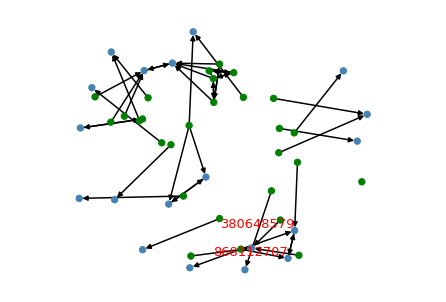

In [43]:
# '2097571','428333','15754281'
edges = [FR_G.in_edges("868112707")] + [FR_G.out_edges("868112707")]
edges += [FR_G.in_edges("380648579")] + [FR_G.out_edges("380648579")]
sub_FR_G = FR_G.subgraph(bridges+nonrum)
colors = [FR_G.nodes[x]["color"] for x in sub_FR_G.nodes()]
labels = {
    "868112707":"868112707",
    "380648579":"380648579"
}
pos = nx.spring_layout(sub_FR_G, k=0.25, iterations=20)
ch.visualize(sub_FR_G,pos,labels,colors,40,"bottom","right")
plt.show()

In [99]:
in_deg = list(FR_G.in_edges('46363353'))
out_deg = list(FR_G.out_edges('46363353'))
edges = in_deg+out_deg
print(in_deg)
print(out_deg)
nodes = set()

for x,y in edges:
    nodes.add(x)
    nodes.add(y)
nodes = list(nodes)
print(nodes)

[('567039350', '46363353')]
[('46363353', '428333'), ('46363353', '567039350'), ('46363353', '2707815410')]
['428333', '46363353', '567039350', '2707815410']


8
{'2097571': 0.5, '2707815410': 0.5952380952380952, '567039350': 0.44642857142857145, '428333': 0.875, '46363353': 0.2976190476190476, '2957564108': 0.2976190476190476, '2762702188': 0.44642857142857145, '2926384805': 0.2976190476190476}


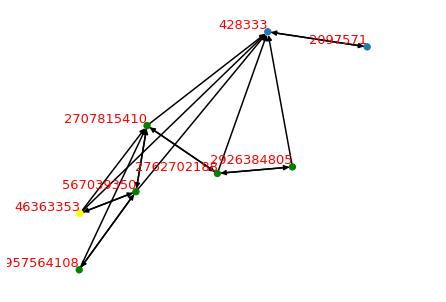

In [187]:
FR_G.reverse()
length = nx.single_source_shortest_path_length(FR_G,"46363353")
reachable= [node for node in length if FR_G.nodes[node]["at"]!="rumours" ]
print(len(reachable))
FR_G.reverse()
sub_FR_G = FR_G.subgraph(reachable)
colors = [y["color"] for x, y in sub_FR_G.nodes(data=True)]
labels = {}
for x,y in sub_FR_G.nodes(data=True):
    labels[x] = x
print(nx.closeness_centrality(sub_FR_G))
pos = nx.spring_layout(sub_FR_G, k=0.15, iterations=20)
ch.visualize(sub_FR_G,pos,labels,colors,40,"bottom","right")

plt.show()

In [111]:
FR_G.reverse()
length = nx.single_source_shortest_path_length(FR_G, "46363353")
print([node for node in length if not(node == b) and FR_G.nodes[node]["at"]=="non_rumours"])

['567039350', '2707815410', '2957564108', '2762702188', '2926384805']


## Degree Centrality 

In degree analysis

In [ ]:
in_degree = nx.in_degree_centrality(G)
rum = {}
non_rum = {}
bridges = {}

for id in list(in_degree):
    if id in communities["rumours"] : rum[id]=in_degree[id]
    elif id in communities["non_rumours"] : non_rum[id]=in_degree[id]
    elif id in communities["bridges"] : bridges[id]=in_degree[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

in_degree = {
    "rumours": rum,
    "non_rum": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"degree"]),"in_degree",in_degree)

In [ ]:
inDegree = ch.degree_centrality(FR_G,"in")
head.writeToJSON(head.makePath([centrality_path,"follow+react","degree"]),"inDegree",inDegree)

Out degree analysis

In [ ]:
out_degree = nx.out_degree_centrality(G)
rum = {}
non_rum = {}
bridges = {}

for id in list(in_degree):
    if id in communities["rumours"] : rum[id]=out_degree[id]
    elif id in communities["non_rumours"] : non_rum[id]=out_degree[id]
    elif id in communities["bridges"] : bridges[id]=out_degree[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

out_degree = {
    "rumours": rum,
    "non_rum": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"degree"]),"out_degree_2",out_degree)


In [ ]:
outDegree = ch.degree_centrality(FR_G,"out")
head.writeToJSON(head.makePath([centrality_path,"follow+react","degree"]),"outDegree",outDegree)

## Betweeness centrality analysis

The betweeness centrality analysis is based upon non-directed graph. 

In [ ]:
bet_cen = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
rum = {}
non_rum = {}
bridges = {}

for id in list(bet_cen):
    if id in communities["rumours"] : rum[id]=bet_cen[id]
    elif id in communities["non_rumours"] : non_rum[id]=bet_cen[id]
    elif id in communities["bridges"] : bridges[id]=bet_cen[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

new_between = {
    "rumours": rum,
    "non_rumours": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"betweeness"]),"directed_betweenness",new_between)

In [3]:
bet_cen = ch.betweeness_centrality(G)
head.writeToJSON(head.makePath([centrality_path,"follow","betweeness"]),"betweeness_2",bet_cen)

In [ ]:
bet_cen = ch.betweeness_centrality(FR_G)
head.writeToJSON(head.makePath([centrality_path,"follow+react","betweeness"]),"betweeness_2",bet_cen)

## Closeness Analysis

Type 1 bridges within rumour community

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by_v2.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

rum_G = nx.DiGraph()

rum_G.add_nodes_from(communities["rumours"])
rumourEdges = []
rumourNodes = communities["rumours"]

non_rumourNodes = communities["non_rumours"]

rum_G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = communities["bridges"]

for id in followed_by:
    if id in non_rumourNodes: continue

    user = followed_by[id]

    for follower in user["rumours"]: 
        rumourEdges.append((follower,id))
        rum_G.add_edge(follower,id)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        rum_G.add_edge(follower,id)

isolates = list(nx.isolates(rum_G))
rum_G.remove_edges_from(isolates)

isolates = set(isolates)
rumourNodes = set(rumourNodes).difference(isolates)
bridgeNodes = set(bridgeNodes).difference(isolates)

In [ ]:
rumour_closeness = nx.closeness_centrality(rum_G)
rum = {}
bridges = {}

for id in list(rumour_closeness):
    if id in communities["rumours"] : rum[id]=rumour_closeness[id]
    elif id in communities["bridges"] : bridges[id]=rumour_closeness[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

rumour_closeness = {
    "rumours": rum,
    "bridges": bridges
}

head.writeToJSON(centrality_path,"rumour_closeness_2",rumour_closeness)

Type 1 bridges within nonrumour community

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by_v2.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

non_rum_G = nx.DiGraph()

rumourNodes = communities["rumours"]

non_rum_G.add_nodes_from(communities["non_rumours"])
non_rumourEdges = []
non_rumourNodes = communities["non_rumours"]

non_rum_G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = communities["bridges"]

for id in followed_by:
    if id in rumourNodes: continue

    user = followed_by[id]

    for follower in user["non_rumours"]: 
        non_rumourEdges.append((follower,id))
        non_rum_G.add_edge(follower,id)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        non_rum_G.add_edge(follower,id)

isolates = list(nx.isolates(non_rum_G))
non_rum_G.remove_edges_from(isolates)

isolates = set(isolates)
rumourNodes = set(rumourNodes).difference(isolates)
non_rumourNodes = set(non_rumourNodes).difference(isolates)
bridgeNodes = set(bridgeNodes).difference(isolates)

In [ ]:
non_rumour_closeness = nx.closeness_centrality(non_rum_G)
non_rum = {}
bridges = {}

for id in list(non_rumour_closeness):
    if id in communities["non_rumours"] : non_rum[id]=non_rumour_closeness[id]
    elif id in communities["bridges"] : bridges[id]=non_rumour_closeness[id]

# Sort each list 
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

non_rumour_closeness = {
    "non_rumours": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"closeness"]),"non_rumour_closeness",non_rumour_closeness)

## Reachable

In [5]:
# number of reachable non-rumour nodes for each bridge (with individual bridge)
R_G = nx.reverse(R_G,copy=True)
reachable = {}
print(bridges)
for b in bridges:
    reachable[b] = []
    length = nx.single_source_shortest_path_length(R_G, b)
    for node in length:
        if node != b and R_G.nodes[node]["at"] == "non_rumours":
            (reachable[b]).append(node)

head.writeToJSON(head.makePath([centrality_path,"react"]),"reachable_nr_nodes_2",reachable)
# print(reachable)

['1367531', '64643056', '15754281', '87416722', '9651232', '5402612', '51241574', '14173315', '3108351', '868112707', '28785486', '2097571', '380648579', '21749564', '718294442', '87818409', '428333', '15164565']


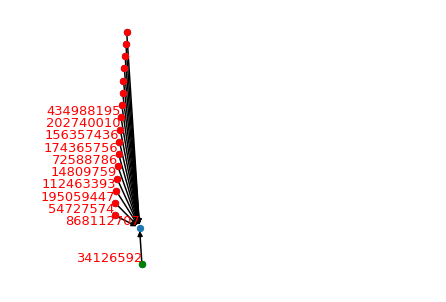

In [50]:
# labels = {}
# nodes = []
# other = []
# for x,y in R_G.nodes(data=True): 
#     if y["at"] == "bridges":
#         nodes.append(x)
#         labels[x] = x
#     if y["at"] == "non_rumours":
#         nodes.append(x)
#         other.append(x)

nodes = []
length = nx.single_source_shortest_path_length(R_G.reverse(copy=True), "868112707")
reactors = [node for node in length]
nodes.extend(reactors)

length = nx.single_source_shortest_path_length(R_G.reverse(copy=True), "34126592")
reactors = [node for node in length]
nodes.extend(reactors)

hubs = ["54727574" ,"195059447" ,"112463393", "14809759" ,"72588786","174365756","156357436","202740010","434988195"]
# ["34126592"]

subGraph = R_G.subgraph(nodes)
# subGraph = subGraph.reverse(copy=True)
bridges = []
rumours = []
nonrumours = []
labels = {}
for x,y in subGraph.nodes(data=True): 
    if y["at"] == "bridges":
        bridges.append(x)
        labels[x] = x
    if y["at"] == "non_rumours":
        nonrumours.append(x)
        labels[x] = x
    if y["at"] == "rumours":
        if (x == "868112707"): print(True)
        rumours.append(x)
        if x in hubs: labels[x] = x
 

# subGraph = R_G.subgraph(nodes)
# pos = nx.spring_layout(R_G, k=0.8)
# pos = nx.planar_layout(R_G)
pos = nx.planar_layout(R_G)

ch.visualize(subGraph,pos,labels,None,40,"bottom","right")
nx.draw_networkx_nodes(subGraph,pos,node_size=40,nodelist=nonrumours, node_color="green")
nx.draw_networkx_nodes(subGraph,pos,node_size=40,nodelist=rumours, node_color="red")
# nx.draw_networkx_nodes(subGraph,pos,node_size=40,nodelist=["54727574", "195059447", "112463393","14809759"], node_color="red")

plt.show() 

In [40]:
print("868112707" in rumours)

True


In [36]:
inDeg = R_G.in_degree()
inDict = {x:y for x,y in inDeg if y>0}
inDict = dict(sorted(inDict.items(), key=lambda item: item[1],reverse=True))
print(inDict)

{'868112707': 17, '64643056': 10, '2097571': 10, '1367531': 9, '3108351': 9, '428333': 8, '51241574': 7, '380648579': 7, '15754281': 6, '5402612': 5, '28785486': 5, '1652541': 5, '34262462': 4, '21749564': 4, '2707815410': 4, '15164565': 4, '16973333': 3, '25049056': 3, '87416722': 3, '9651232': 3, '7587032': 3, '14293310': 3, '718294442': 3, '567039350': 3, '1994321': 2, '14173315': 2, '2461887810': 2, '747822822': 2, '87818409': 2, '2762702188': 2, '1299769218': 2, '212369763': 1, '32272710': 1, '1670896333': 1, '240028072': 1, '271413771': 1, '372502604': 1, '174253648': 1, '2943604810': 1, '16343974': 1, '14511951': 1, '2957564108': 1, '46363353': 1, '2926384805': 1}


### Follow+React

In [ ]:
nodes = []
for x,y in FR_G.nodes(data=True):
    if y["at"] == "rumours": nodes.append(x)
    elif y["at"] == "bridges": nodes.append(x)

subGraph = FR_G.subgraph(nodes)

closeness = ch.closeness_centrality(subGraph)
head.writeToJSON(head.makePath([centrality_path,"follow+react","closeness"]),"rumours+bridges",closeness)

In [24]:
# number of reachable non-rumour nodes for each bridge
nodes = []
bridges = []
for x,y in FR_G.nodes(data=True):
    if y["at"] == "non_rumours": nodes.append(x)
    elif y["at"] == "bridges": nodes.append(x); bridges.append(x)

subGraph = FR_G.subgraph(nodes)
subGraph = subGraph.reverse(copy=True)
reachable = {}
for n in bridges:
    length = nx.single_source_shortest_path_length(subGraph, n)
    reachable[n] = [node for node in length if n!=node and not(node in bridges)]
    # print(f"{n}: {reachable[n]}")

head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"reachable_nr_nodes",reachable)

## Visualization

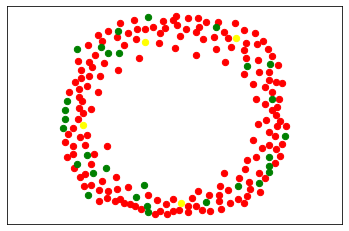

In [6]:
# General Display of rumour, non-rumour, and uncategorized communities
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/communities.json") as file:
    communities  = json.load(file)

gen_G = nx.DiGraph()
attributes = {}
for com, ids in communities.items():
    gen_G.add_nodes_from(ids)
    for id in ids:
        attributes[id]=com

nx.set_node_attributes(gen_G,attributes,"at")

pos = nx.spring_layout(gen_G, k=1, iterations=20)
nx.draw_networkx_nodes(gen_G,pos,nodelist=[x for x,y in gen_G.nodes(data=True) if y["at"]=="rumours"],node_color="red",node_size=40)
nx.draw_networkx_nodes(gen_G,pos,nodelist=[x for x,y in gen_G.nodes(data=True) if y["at"]=="non_rumours"],node_color="green",node_size=40)
nx.draw_networkx_nodes(gen_G,pos,nodelist=[x for x,y in gen_G.nodes(data=True) if y["at"]=="uncategorized"],node_color="yellow",node_size=40)

x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

ax = plt.subplots()

plt.show() 


## HITS

In [12]:
# Follow Graph
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow/with_bridges.json") as file:
    communities = json.load(file)

G.remove_nodes_from(list(nx.isolates(G)))    
h,a = ch.HITS(G,100)

dic = {
    "hub":{},
    "authority":{}
}

hub = dic["hub"]
aut = dic["authority"]

for id in h:
    if id in communities["rumours"]: hub[id] = "rumours"
    if id in communities["non_rumours"]: hub[id] = "non_rumours"
    if id in communities["bridges"]: hub[id] = "bridges"
    if id in communities["uncategorized"]: hub[id] = "uncategorized"

for id in a:
    if id in communities["rumours"]: aut[id] = "rumours"
    if id in communities["non_rumours"]: aut[id] = "non_rumours"
    if id in communities["bridges"]: aut[id] = "bridges"
    if id in communities["uncategorized"]: aut[id] = "uncategorized"


head.writeToJSON(head.makePath([centrality_path,"follow","hits"]),"hub",h)
head.writeToJSON(head.makePath([centrality_path,"follow","hits"]),"authority",a)
head.writeToJSON(head.makePath([centrality_path,"follow","hits"]),"HITS_com",dic)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [5]:
# React Graph
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/react/communities.json") as file:
    communities = json.load(file)

h,a = ch.HITS(R_G,100)

dic = {
    "hub":{},
    "authority":{}
}

hub = dic["hub"]
aut = dic["authority"]

for id in h:
    if id in communities["rumours"]: hub[id] = "rumours"
    if id in communities["non_rumours"]: hub[id] = "non_rumours"
    if id in communities["bridges"]: hub[id] = "bridges"
    if id in communities["uncategorized"]: hub[id] = "uncategorized"

for id in a:
    if id in communities["rumours"]: aut[id] = "rumours"
    if id in communities["non_rumours"]: aut[id] = "non_rumours"
    if id in communities["bridges"]: aut[id] = "bridges"
    if id in communities["uncategorized"]: aut[id] = "uncategorized"


head.writeToJSON(head.makePath([centrality_path,"react","hits"]),"hub",h)
head.writeToJSON(head.makePath([centrality_path,"react","hits"]),"authority",a)
head.writeToJSON(head.makePath([centrality_path,"react","hits"]),"HITS_com",dic)

In [39]:
# Follow+React Graph
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow+react/communities.json") as file:
    communities = json.load(file)

h,a = ch.HITS(FR_G,100)

dic = {
    "hub":{},
    "authority":{}
}

hub = dic["hub"]
aut = dic["authority"]

for id in h:
    if id in communities["rumours"]: hub[id] = "rumours"
    if id in communities["non_rumours"]: hub[id] = "non_rumours"
    if id in communities["bridges"]: hub[id] = "bridges"
    if id in communities["uncategorized"]: hub[id] = "uncategorized"

for id in a:
    if id in communities["rumours"]: aut[id] = "rumours"
    if id in communities["non_rumours"]: aut[id] = "non_rumours"
    if id in communities["bridges"]: aut[id] = "bridges"
    if id in communities["uncategorized"]: aut[id] = "uncategorized"

head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"hub",h)
head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"authority",a)
head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"HITS_com",dic)

### Follow

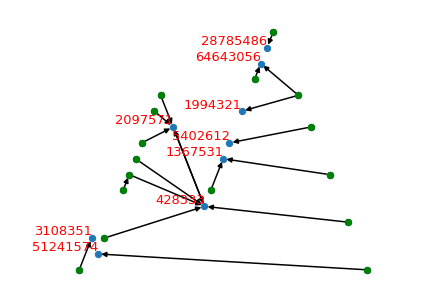

In [69]:
# Bridge community
labels = {}
nodes = []
bridge = []
for key, attr in G.nodes(data=True):
    if attr["at"] == "bridges": 
        bridge.append(key)
        nodes.append(key)
    elif attr["at"] == "non_rumours": 
        nodes.append(key)

subGraph = G.subgraph(nodes)

for id in bridge:
    labels[id] = id

pos = nx.planar_layout(subGraph)
# pos = nx.spring_layout(G, k=1, iterations=20)
ch.visualize(subGraph,pos,labels,None,40,"bottom","right")
nx.draw_networkx_nodes(subGraph,pos,nodelist=[x for x in nodes if not(x in bridge)],node_color="green",node_size=40)

plt.show() 

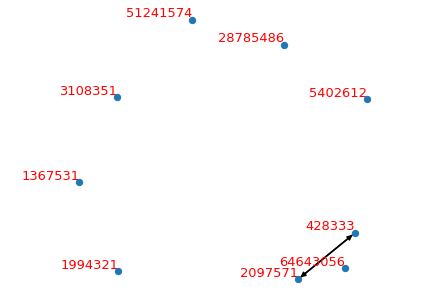

In [70]:
# Bridge community
labels = {}
bridge = []
for key, attr in G.nodes(data=True):
    if attr["at"] == "bridges": 
        bridge.append(key)

subGraph = G.subgraph(bridge)

for id in bridge:
    labels[id] = id

pos = nx.planar_layout(subGraph)
# pos = nx.spring_layout(G, k=1, iterations=20)
ch.visualize(subGraph,None,labels,None,40,"bottom","right")

plt.show() 

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow/with_bridges.json") as file:
    communities = json.load(file)

# with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality/degree/in_degree.json") as file:
#     in_degree = json.load(file)

rum_community = communities["rumours"]

G = nx.DiGraph()
G.add_nodes_from(rum_community)

for id in rum_community:
    try : followers = (followed_by[id])["rumours"]
    except: continue
    
    for f in followers:
        G.add_edge(f,id)

labels = {}
for id in G:
    if (G.in_degree[id] > 2) : labels[id] = id+": "+str(G.in_degree[id])

# pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=0.8)
# , iterations=20
nx.draw(G,pos,node_size=40)
nx.draw_networkx_nodes(G,pos,nodelist=labels.keys(), node_size=60)
nx.draw_networkx_labels(G,pos,labels,font_size=13,font_color='r')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.show()

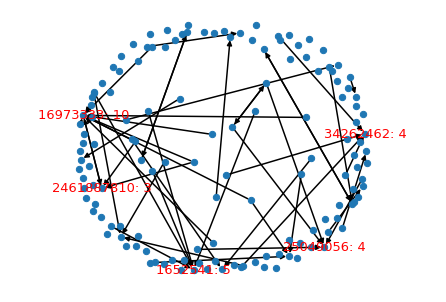

In [65]:
labels = {}
nodes = []
for key, attr in FR_G.nodes(data=True):
    if attr["at"] == "rumours": 
        nodes.append(key)

subGraph = FR_G.subgraph(nodes)

for n in nodes:
    labels[n] = subGraph.in_degree[n]

labels = dict(sorted(labels.items(), key=lambda item: item[1],reverse=True))
for id, label in labels.items():
    labels[id] = id+": "+str(label)
labels = dict(islice(labels.items(), 5))

ch.visualize(subGraph,labels,None,40)

Connectivity within non-rumour community

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

# with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality/degree/in_degree.json") as file:
#     in_degree = json.load(file)

nonrum_community = communities["non_rumours"]

G = nx.DiGraph()
G.add_nodes_from(nonrum_community)

for id in nonrum_community:
    try : followers = (followed_by[id])["non_rumours"]
    except: continue
    
    for f in followers:
        G.add_edge(f,id)

labels = {}
for id in G:
    if (G.in_degree[id] > 0) : labels[id] = id+": "+str(G.in_degree[id])

# pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=0.8)
# , iterations=20
nx.draw(G,pos,node_size=40,node_color="green")
nx.draw_networkx_nodes(G,pos,nodelist=labels.keys(), node_size=60)
nx.draw_networkx_labels(G,pos,labels,font_size=13,font_color='r')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.show()

In [72]:
labels = {}
nodes = []
for key, attr in FR_G.nodes(data=True):
    if attr["at"] == "non_rumours":
        nodes.append(key)

subGraph = FR_G.subgraph(nodes)

for n in nodes:
    labels[n] = subGraph.in_degree[n]

labels = dict(sorted(labels.items(), key=lambda item: item[1],reverse=True))
for id, label in labels.items():
    labels[id] = id+": "+str(label)

labels = dict(islice(labels.items(), 5))
ch.visualize(subGraph,labels,"green",40)

TypeError: visualize() missing 3 required positional arguments: 'nodeSize', 'vertAlign', and 'horAlign'

<function matplotlib.pyplot.show(close=None, block=None)>

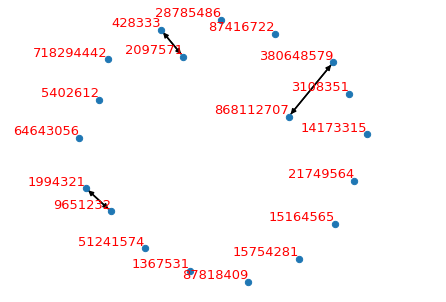

In [75]:
labels = {}
nodes = []
for key, attr in FR_G.nodes(data=True):
    if attr["at"] == "bridges":
        nodes.append(key)

subGraph = FR_G.subgraph(nodes)

for n in nodes:
    labels[n] = n
# pos = nx.planar_layout(subGraph)
# pos = nx.spring_layout(G, k=1, iterations=20)
ch.visualize(subGraph,None,labels,None,40,"bottom","right")

plt.show

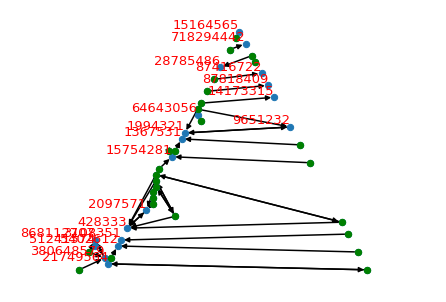

In [71]:
# Bridge community
labels = {}
nodes = []
bridge = []
for key, attr in FR_G.nodes(data=True):
    if attr["at"] == "bridges": 
        bridge.append(key)
        nodes.append(key)
    elif attr["at"] == "non_rumours": 
        nodes.append(key)

subGraph = FR_G.subgraph(nodes)

for id in bridge:
    labels[id] = id

pos = nx.planar_layout(subGraph)
# pos = nx.spring_layout(G, k=1, iterations=20)
ch.visualize(subGraph,pos,labels,None,40,"bottom","right")
nx.draw_networkx_nodes(subGraph,pos,nodelist=[x for x in nodes if not(x in bridge)],node_color="green",node_size=40)

plt.show() 